# Derivation of non-centered BW DDX scheme when not using extra ghost point

The non-centred version is used when the field is evaluated one point from the processor boundary. The following scheme is 3rd order convergent.

In [1]:
from IPython.display import display
from sympy import init_printing
from sympy import symbols, together, as_finite_diff, simplify
from sympy import Function, Eq, S

init_printing()

In [2]:
x = symbols('x')
h = symbols('h', positive=True)

f = Function('f')

stencil = [x-3*h, x-2*h, x-h, x]

We are here discretizing the equation

$$ \partial_\rho f$$

### Calculate the finite difference approximation of $\partial_x f$

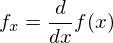

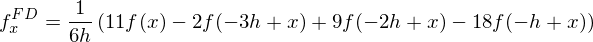

In [3]:
fx = f(x).diff(x)
fxFD = as_finite_diff(fx, stencil)
display(Eq(symbols('f_x'), fx))
display(Eq(symbols('f^FD_x'), together(fxFD)))

# Calculating the order

Let's call the Taylor expansions of $f$ for $T[f(x,a)] = \sum_{n=0}^\infty\frac{f^{(n)}(a)}{n!}(x-a)^n$

In [4]:
x0 = symbols('x0')
terms = 7

Taylor expasion of $f$ expanded around $a=x_0-3h$ evaluated in $x=x_0$

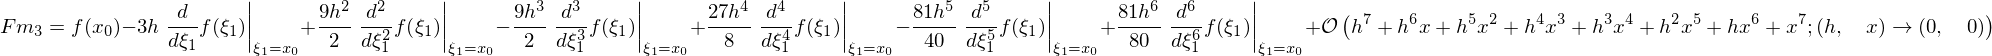

In [5]:
Fm3 = f(x-3*h).series(x-3*h, x0=x0, n=terms)
Fm3 = Fm3.subs(x-x0,0)
display(Eq(symbols('Fm3'),Fm3))

Taylor expasion of $f$ expanded around $a=x_0-2h$ evaluated in $x=x_0$

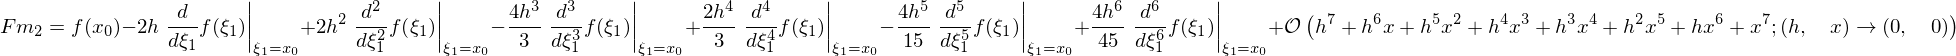

In [6]:
Fm2 = f(x-2*h).series(x-2*h, x0=x0, n=terms)
Fm2 = Fm2.subs(x-x0,0)
display(Eq(symbols('Fm2'),Fm2))

Taylor expasion of $f$ expanded around $a=x_0-h$ evaluated in $x=x_0$

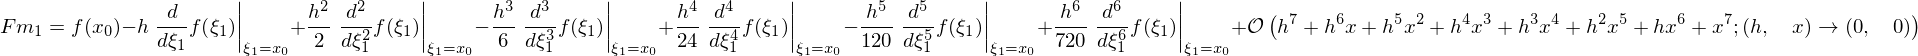

In [7]:
Fm1 = f(x-h).series(x-h, x0=x0, n=terms)
Fm1 = Fm1.subs(x-x0,0)
display(Eq(symbols('Fm1'),Fm1))

Taylor expasion of $f$ expanded around $a=x_0$ evaluated in $x=x_0$

In [8]:
F = f(x).series(x, x0=x0, n=terms)
F = F.subs(x-x0,0)
display(Eq(symbols('F'),F))

Substitute into the FD scheme

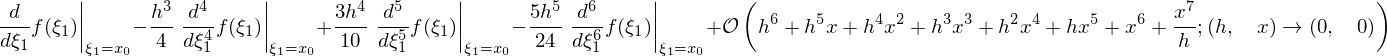

In [9]:
fxFDT = fxFD.subs([ 
                     (f(x-3*h), Fm3),
                     (f(x-2*h), Fm2),
                     (f(x-h)  , Fm1),
                     (f(x)    , F  ),   
                    ])
display(simplify(fxFDT))

Thus, we see that this discretization is 3rd order accurate.